In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import uniform

%matplotlib inline


# EDA: Preliminary data analysis


<div class="alert alert-block alert-info">
<b>1:</b> Who are the most valuable players in the EPL?
</div>

In [135]:
All_players =  pd.read_csv('epldata_final.csv')

All_players.sort_values('fpl_value',ascending=False).head(6)


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1.0,England,0,2,17,1,0
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
260,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,45.00%,221,2.0,Belgium,0,2,12,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0
251,Gabriel Jesus,Manchester+City,20,CF,1,30.0,4254,10.5,15.20%,67,3.0,Brazil,0,1,11,1,1
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0


<div class="alert alert-block alert-info">
<b>2:</b> Who are the most popular players?
</div>

In [136]:
All_players.sort_values('page_views',ascending=False).head(6)


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
143,Wayne Rooney,Everton,31,SS,1,15.0,7664,7.5,20.90%,76,1.0,England,0,4,7,0,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1.0,England,0,1,17,1,0
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2.0,Spain,0,4,5,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0


<div class="alert alert-block alert-info">
<b>3:</b> Distribution of Market Value
</div>

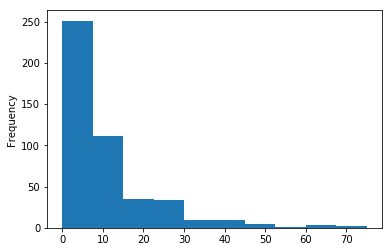

In [137]:
MV = All_players['market_value']

MV.sort_values(ascending=True).plot(kind='hist')

<div class="alert alert-block alert-info">
<b>4:</b> Does it look different for the Top 6?
</div>

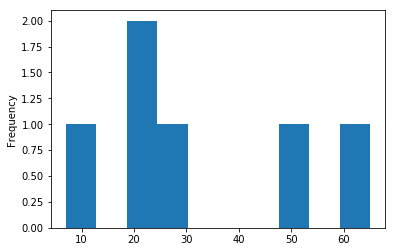

In [138]:
MV2 = All_players['market_value'].head(6)
MV2.sort_values(ascending=True).plot(kind='hist')

Does it look different for the Top 6?

yes 

<div class="alert alert-block alert-info">
<b>5:</b> Distribution of popularity
</div>

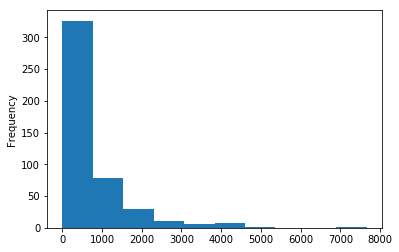

In [139]:
PP = All_players['page_views']

PP.sort_values(ascending=False).plot(kind='hist')

<div class="alert alert-block alert-info">
<b>6:</b> Top 6 vs the rest
</div>

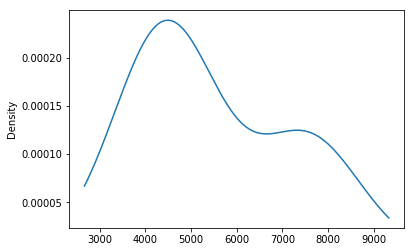

In [140]:
TOP6 = All_players.sort_values('page_views',ascending=False).head(6)

TOP6['page_views'].sort_values(ascending=False).plot(kind='density')

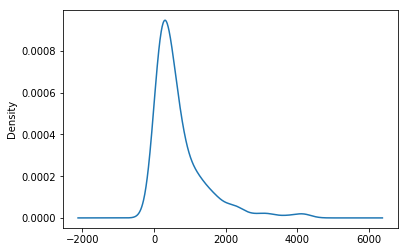

In [141]:
All_players = All_players.sort_values('page_views',ascending=False)
REST = All_players[6:]
REST['page_views'].sort_values(ascending=False).plot(kind='density')

# EDA: Detailed data analysis



<div class="alert alert-block alert-info">
<b>1:</b> FPL Valuation
</div>

In [142]:
# calculate the correlation in the metric dataset, in Pandas
correlation = All_players['fpl_value'].corr(All_players['fpl_points'])
# print results 
print('Correlation in metric system: %0.2f' % correlation)



Correlation in metric system: 0.62


The correlation between the fpl value and points indicates that the relation between them is positive 
so , when the point increases the value increases aswell 


<div class="alert alert-block alert-info">
<b>2:</b> Market Value with Age
</div>

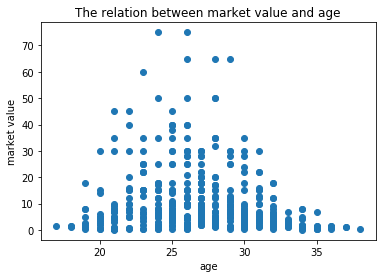

In [143]:
plt.scatter( All_players['age'],All_players['market_value'])
plt.title('The relation between market value and age')
plt.xlabel('age')
plt.ylabel('market value')
plt.show()

<div class="alert alert-block alert-info">
<b>3:</b> Who’s stocking up at which position?
</div>

<div class="alert alert-block alert-success">
<b>MOST ATTACKER:</b>
</div>

In [144]:
attackers = All_players[All_players.position_cat==1]
attackers['club'].value_counts().head(2)

Huddersfield    11
Liverpool       11
Name: club, dtype: int64

<div class="alert alert-block alert-success">
<b>Midfielders :</b> 
</div>

In [149]:
midfielders  = All_players[All_players.position_cat==2]
midfielders ['club'].value_counts().head(1)

Burnley    8
Name: club, dtype: int64

<div class="alert alert-block alert-success">
<b>Defenders :</b>
</div>

In [146]:
defenders  = All_players[All_players.position_cat==3]
defenders['club'].value_counts().head(4)

Manchester+United    10
Huddersfield         10
Everton              10
Arsenal              10
Name: club, dtype: int64

<div class="alert alert-block alert-success">
<b>Goal keepers:</b> 
</div>

In [151]:
goalkeepers  = All_players[All_players.position_cat==4]
goalkeepers['club'].value_counts().head(4)

Arsenal              3
Manchester+United    3
Bournemouth          3
Everton              3
Name: club, dtype: int64